In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
training = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [6]:
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

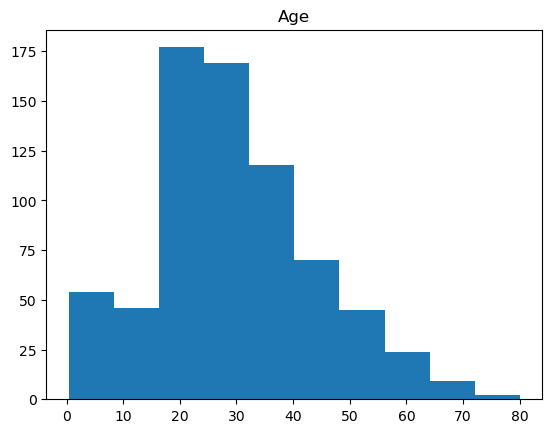

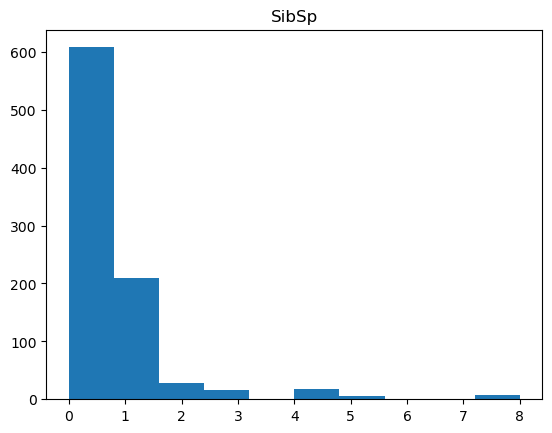

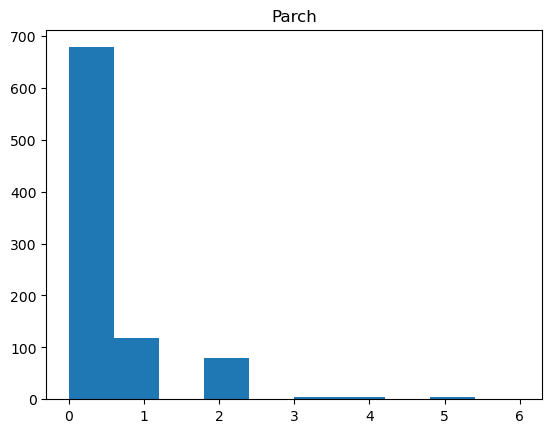

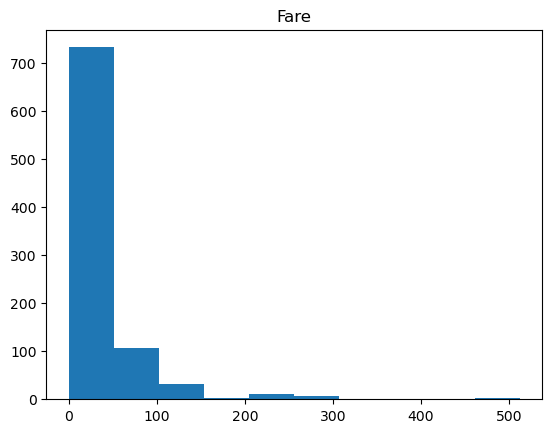

In [7]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [8]:
print(df_num.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


In [9]:
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [10]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print('\n')
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print('\n')
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Sex       female  male
Survived              
0             81   468
1            233   109


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [11]:
training['Cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['Cabin_alphabet'] = training.Cabin.apply(lambda x: str(x)[0])

In [12]:
print(training['Cabin_multiple'].value_counts())
print('\n')
print(training.Cabin_alphabet.value_counts())

0    687
1    180
2     16
3      6
4      2
Name: Cabin_multiple, dtype: int64


n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_alphabet, dtype: int64


In [13]:
pd.pivot_table(training, index = 'Survived', columns = 'Cabin_multiple', values = 'Ticket' ,aggfunc ='count')

Cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [14]:
pd.pivot_table(training,index='Survived',columns='Cabin_alphabet', values = 'Name', aggfunc='count')

Cabin_alphabet,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [15]:
training['Ticket_Numeric'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['Ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [16]:
print(training['Ticket_Numeric'].value_counts())
print(training['Ticket_letters'].value_counts())

1    661
0    230
Name: Ticket_Numeric, dtype: int64
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: Ticket_letters, dtype: int64


In [17]:
pd.pivot_table(training,index='Survived',columns='Ticket_Numeric', values = 'Ticket', aggfunc='count')

Ticket_Numeric,0,1
Survived,,
0,142,407
1,88,254


In [18]:
pd.pivot_table(training,index='Survived',columns='Ticket_letters', values = 'Ticket', aggfunc='count')

Ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [19]:
training['Name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['Name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name_title, dtype: int64

In [20]:
pd.pivot_table(training,index='Survived',columns='Name_title',values='PassengerId',aggfunc='count')

Name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [21]:
all_data['Cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['Cabin_alphabet'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['Ticket_numeric'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['Ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['Name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [22]:
all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

In [23]:
all_data.dropna(subset=['Embarked'],inplace = True)

<AxesSubplot:>

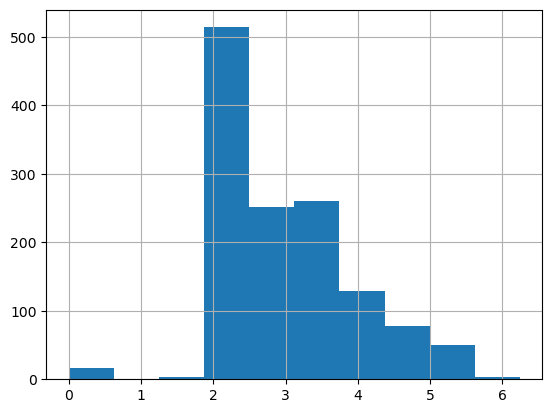

In [24]:
all_data['Norm_fare'] = np.log(all_data.Fare+1)
all_data['Norm_fare'].hist()

In [25]:
all_data.Pclass = all_data.Pclass.astype(str)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','Norm_fare','Embarked','Cabin_alphabet','Cabin_multiple','Ticket_numeric','Name_title','train_test']])

In [26]:
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)
Y_train = all_data[all_data.train_test==1].Survived
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      889 non-null    float64
 1   SibSp                    889 non-null    int64  
 2   Parch                    889 non-null    int64  
 3   Norm_fare                889 non-null    float64
 4   Cabin_multiple           889 non-null    int64  
 5   Ticket_numeric           889 non-null    int64  
 6   Pclass_1                 889 non-null    uint8  
 7   Pclass_2                 889 non-null    uint8  
 8   Pclass_3                 889 non-null    uint8  
 9   Sex_female               889 non-null    uint8  
 10  Sex_male                 889 non-null    uint8  
 11  Embarked_C               889 non-null    uint8  
 12  Embarked_Q               889 non-null    uint8  
 13  Embarked_S               889 non-null    uint8  
 14  Cabin_alphabet_A         8

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','Norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [29]:
gnb=GaussianNB()
accgnb=cross_val_score(gnb,X_train_scaled,Y_train,cv=5)
print(accgnb)
print(accgnb.mean())

[0.66292135 0.71348315 0.75842697 0.74719101 0.73446328]
0.7232971497492542


In [30]:
lr=LogisticRegression(max_iter=2000)
acclr=cross_val_score(lr,X_train,Y_train,cv=5)
print(acclr)
print(acclr.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [31]:
dt=tree.DecisionTreeClassifier(random_state=1)
accdt=cross_val_score(dt,X_train,Y_train,cv=5)
print(accdt)
print(accdt.mean())
print(type(accdt))

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065
<class 'numpy.ndarray'>


In [32]:
rf=RandomForestClassifier(random_state=1)
accrf=cross_val_score(rf,X_train,Y_train,cv=5)
print(accrf)
print(accrf.mean())

[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [33]:
xgb=XGBClassifier(random_state=1)
accxgb=cross_val_score(xgb,X_train,Y_train,cv=5)
print(accxgb)
print(accxgb.mean())

[0.82022472 0.81460674 0.85393258 0.79775281 0.81355932]
0.8200152351932963


In [34]:
knn=KNeighborsClassifier()
accknn=cross_val_score(knn,X_train,Y_train,cv=5)
print(accknn)
print(accknn.mean())

[0.76966292 0.80337079 0.80898876 0.82022472 0.85310734]
0.8110709071288008


In [35]:
svc=SVC()
accsvc=cross_val_score(svc,X_train,Y_train,cv=5)
print(accsvc)
print(accsvc.mean())

[0.69101124 0.76966292 0.71348315 0.71910112 0.74011299]
0.7266742842633149


In [36]:
from sklearn.ensemble import VotingClassifier
vclf=VotingClassifier(estimators=[('svc',svc),('knn',knn),('xgb',xgb),('rf',rf),('lr',lr),('gnb',gnb)],voting='hard',n_jobs=-1)
accvclf=cross_val_score(vclf,X_train_scaled,Y_train,cv=5)
print(accvclf)
print(accvclf.mean())

[0.84831461 0.82022472 0.85393258 0.79775281 0.85310734]
0.8346664127467784


In [37]:
vclf.fit(X_train_scaled,Y_train)
Y_survived=vclf.predict(X_test_scaled).astype(int)
data_submission={'PassengerId':test.PassengerId,'Survived':Y_survived}
data_submission=pd.DataFrame(data=data_submission)
data_submission.to_csv('data_submission.csv',index=False)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [39]:
def performance_clf(classifier,model_name):
    print(model_name)
    print('Best_score'+str(classifier.best_score_))
    print('Best_parameters'+str(classifier.best_params_))

In [40]:
lr=LogisticRegression()
pram_grid={
    'max_iter':[2000],
    'penalty' :['l1','l2'],
    'C'       :np.logspace(-4,4,20),
    'solver'  :['liblinear']
}
lr_clf=GridSearchCV(lr,param_grid=pram_grid,cv=5,verbose=True,n_jobs=-1)
lr_clf=lr_clf.fit(X_train_scaled,Y_train)
performance_clf(lr_clf,'Logistc_Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistc_Regression
Best_score0.8268075922046594
Best_parameters{'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [41]:
knn=KNeighborsClassifier()
param_grid={
    'n_neighbors':[3,5,6,7,9],
    'weights' :['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree'],
    'p':[1,2]
}
knn_clf=GridSearchCV(knn,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)
knn_clf=knn_clf.fit(X_train_scaled,Y_train)
performance_clf(knn_clf,'KNeighborClassifier')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
KNeighborClassifier
Best_score0.8233987177045641
Best_parameters{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


In [42]:
svc = SVC()
param_grid= {'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]}
                
                                 
svc_clf = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
svc_clf = svc_clf.fit(X_train_scaled,Y_train)
performance_clf(svc_clf,'SVC')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
SVC
Best_score0.8324319177299563
Best_parameters{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [43]:
rf=RandomForestClassifier(random_state=1)
param_grid={
    'n_estimators':[100,500,1000],
    'bootstrap':[True,False],
    'max_depth':[3,5,10,20,50,75,None],
    'max_features':['auto','sqrt'],
    'min_samples_leaf':[1,2,4,10],
    'min_samples_split':[2,5,10]
}
rf_clf_rnd=RandomizedSearchCV(rf,param_distributions=param_grid,n_iter=50,cv=5,verbose=True,n_jobs=-1)
rf_clf_rnd=rf_clf_rnd.fit(X_train_scaled,Y_train)
performance_clf(rf_clf_rnd,'rf_rnd')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
rf_rnd
Best_score0.8335428172411603
Best_parameters{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [44]:
rf=RandomForestClassifier(random_state=1)
param_grid={
    'n_estimators':[400,450,500,550],
    'criterion':['gini','entropy'],
    'bootstrap':[True],
    'max_depth':[15,20,25],
    'max_features':['auto','sqrt',10],
    'min_samples_leaf':[2,3],
    'min_samples_split':[2,3]
}
rf_clf=GridSearchCV(rf,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)
rf_clf=rf_clf.fit(X_train_scaled,Y_train)
performance_clf(rf_clf,'rf')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
rf
Best_score0.8357963562496031
Best_parameters{'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}


In [45]:
'''from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
xgb=XGBClassifier(random_state=1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,Y_train)
performance_clf(best_clf_xgb_rnd,'XGB')'''

"from xgboost import XGBClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\nxgb=XGBClassifier(random_state=1)\n\nparam_grid = {\n    'n_estimators': [20, 50, 100, 250, 500,1000],\n    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],\n    'max_depth': [2, 5, 10, 15, 20, 25, None],\n    'reg_alpha': [0, 0.5, 1],\n    'reg_lambda': [1, 1.5, 2],\n    'subsample': [0.5,0.6,0.7, 0.8, 0.9],\n    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],\n    'gamma':[0,.01,.1,1,10,100],\n    'min_child_weight':[0,.01,0.1,1,10,100],\n    'sampling_method': ['uniform', 'gradient_based']\n}\n\nclf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,Y_train)\nperformance_clf(best_clf_xgb_rnd,'XGB')"

In [1]:
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier(random_state=1)
param_grid={
    'n_estimators':[450,500,550],
    'colsample_bytree':[0.75,0.8,0.85],
    'max_depth':[None],
    'reg_alpha':[1],
    'reg_lambda':[2, 5, 10],
    'subsample':[0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method':['uniform']
}
xgb_clf=GridSearchCV(xgb,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)
xgb_clf=xgb_clf.fit(X_train_scaled,Y_train)
performance_clf(xgb_clf,'XGB')

NameError: name 'XGBClassifier' is not defined

In [ ]:
Y_survived=xgb_clf.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission={'passenger':test.PassengerId,'Survived':Y_survived}
xgb_submission=pd.DataFrame(data=xgb_submission)
xgb_submission.to_csv('xgb_submission.csv',index=False)

In [ ]:
lr_best=lr_clf.best_estimator_
knn_best=knn_clf.best_estimator_
svc_best=svc_clf.best_estimator_
rf_best=rf_clf.best_estimator_
xgb_best=xgb_clf.best_estimator_

In [ ]:
voting_clf_hard=VotingClassifier(estimators=[('knn',knn_best),('rf',rf_best),('svc',svc_best)],voting='hard')
voting_clf_soft=VotingClassifier(estimators=[('knn',knn_best),('rf',rf_best),('svc',svc_best)],voting='soft')
voting_clf_all_soft=VotingClassifier(estimators=[('knn',knn_best),('rf',rf_best),('svc',svc_best),('lr',lr_best)],voting='soft')
voting_clf_xgb_soft=VotingClassifier(estimators=[('knn',knn_best),('rf',rf_best),('svc',svc_best),('lr',lr_best),('xgb',xgb_best)],voting='soft')

In [ ]:
print('voting_clf_hard:',cross_val_score(voting_clf_hard,X_train,Y_train,cv=5))
print('voting_clf_hard_mean:',cross_val_score(voting_clf_hard,X_train,Y_train,cv=5).mean())
print('\n')
print('voting_clf_soft:',cross_val_score(voting_clf_soft,X_train,Y_train,cv=5))
print('voting_clf_soft_mean:',cross_val_score(voting_clf_soft,X_train,Y_train,cv=5).mean())
print('\n')
print('voting_clf_all :',cross_val_score(voting_clf_all_soft,X_train,Y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all_soft,X_train,Y_train,cv=5).mean())
print('\n')
print('voting_clf_xgb :',cross_val_score(voting_clf_xgb_soft,X_train,Y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb_soft,X_train,Y_train,cv=5).mean())

In [ ]:
params={'weights':[[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}
vote_weight=GridSearchCV(voting_clf_soft,param_gird=params,cv=5,verbose=True,n_jobd=-1)
vote_weight=vote.fit(X_train_scaled,Y_train)
performance_clf(vote_weight,'SV weights')
voting_clf_sub.best_estimator_.predict(X_train_scaled)

In [ ]:
voting_clf_hard.fit(X_train_scaled,Y_train)
voting_clf_soft.fit(X_train_scaled,Y_train)
voting_clf_all_soft.fit(X_train_scaled,Y_train)
voting_clf_xgb_soft.fit(X_train_scaled,Y_train)

In [ ]:
rf_best.fit(X_train_scaled, y_train)

In [ ]:
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all_soft = voting_clf_all_soft.predict(X_test_scaled).astype(int)
y_hat_vc_xgb_soft = voting_clf_xgb_soft.predict(X_test_scaled).astype(int)

In [ ]:
y_hat_rf = rf_best.predict(X_test_scaled).astype(int)

In [ ]:
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all_soft}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_xgb_soft}
submission_5 = pd.DataFrame(data=final_data_5)


In [ ]:
final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all_soft,  'Survived_vc_xgb' : y_hat_vc_xgb_soft}
comparison = pd.DataFrame(data=final_data_comp)

In [ ]:
comparision['difference_vc_rf_hard']=comparision.apply(lambda x: 1 if x.Survived_vc!=x.Survived_rf else 0,axis=1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [ ]:
comparison.difference_hard_all.value_counts()

In [ ]:
submission.to_csv('submission_rf.csv',index=False)
submission_2.to_csv('submission_vc_hard.csv',index=False)
submission_3.to_csv('submission_vc_soft.csv',index=False)
submission_4.to_csv('submission_vc_all.csv',index=False)
submission_5.to_csv('submission_vc_xgb.csv',index=False)